In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

HDF5 files can be read using the h5py package.  
In this example the data is converted to a python dictionary.

In [2]:
with h5py.File('M=100_training_data.hdf5', 'r') as f:
    keys = f.keys()
    print(keys)
    # build a dict (dataset.value has been deprecated. Use dataset[()] instead.)
    data = {key:f[key][()] for key in keys}

<KeysViewHDF5 ['energies', 'potential', 'wavefunctions']>


The data files contain the four energetically lowest solutions of the Schroedinger equation for each potential.

In [3]:
print(data['energies'].shape)
print(data['wavefunctions'].shape)

(100, 4)
(100, 500, 4)


Plot first potential and the corresponding ground state wave function

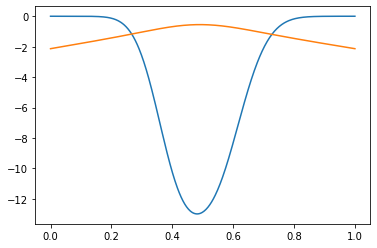

In [4]:
x = np.linspace(0, 1, 500)
plt.plot(x, data['potential'][0])
plt.plot(x, data['wavefunctions'][0, :, 0] + data['energies'][0, 0])

The kinetic energy can be reconstructed by subtracting the potential energy  
$V = \int n V(x) dx$  
with  
$n = \sum_i^N \psi_i(x)^2$  
from the total energy  
$E = \sum_i^N E_i$  
for a given number of particles N.

As an example for N = 2 these quantities can be calculated by

In [5]:
N = 2
n = np.sum(data['wavefunctions'][:, :, :N]**2, axis=-1)
# integrate using trapezoidal rule:
V = np.sum(0.5*(data['potential'][:, :-1]*n[:, :-1] 
                + data['potential'][:, 1:]*n[:, 1:])           
           * (x[1] - x[0]), axis=-1)
T = np.sum(data['energies'][:, :N], axis=-1) - V

Plot of the densities in the data set

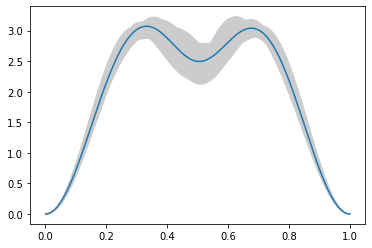

In [6]:
plt.plot(x, n[0])
plt.fill_between(x, np.min(n, axis=0), np.max(n, axis=0), color='0.8')

Histogram of the kinetic energies

(array([ 4.,  6.,  6., 11.,  8.,  5.,  9.,  5.,  7.,  6.,  6.,  5.,  7.,
         2.,  3.,  3.,  4.,  0.,  1.,  2.]),
 array([24.72467507, 24.78487767, 24.84508027, 24.90528287, 24.96548548,
        25.02568808, 25.08589068, 25.14609328, 25.20629589, 25.26649849,
        25.32670109, 25.38690369, 25.4471063 , 25.5073089 , 25.5675115 ,
        25.6277141 , 25.68791671, 25.74811931, 25.80832191, 25.86852451,
        25.92872712]),
 <a list of 20 Patch objects>)

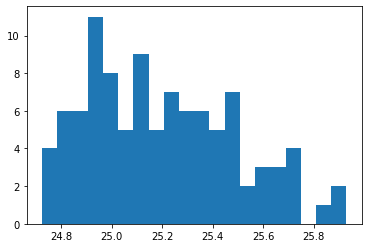

In [7]:
plt.hist(T, bins=20)